In [13]:
import turicreate
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load data of houses prices in Seattle

In [4]:
sales = turicreate.SFrame('data.frame_idx')
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


### Which postcode has the most expensive houses in average?

In [6]:
mini = pd.DataFrame(sales['price','zipcode'])
zipcodes = mini.groupby('zipcode').mean() #Group by zipcode and obtain average
zipcodes.sort_values('price',ascending=False).head()

,price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012582e+05


#### Zipcode 98039 has an average price of $2.160607e+06

## Simple regression with one feature: square feet

First step is to divide our data into training set and test set, then we create the model with the former

In [8]:
training_set, test_set = sales.random_split(.7,seed=0)
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 14464

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.008221     | 4308631.826488     | 1932551.076456       | 263667.553914                   | 261992.947292                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

### Evaluating the model

In [11]:
sqft_model.evaluate(test_set)


{'max_error': 4111260.38090975, 'rmse': 256417.8744102763}

In [12]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-54198.53055258095,5424.342563541569
sqft_living,None,285.9391455655037,2.3813807206055078


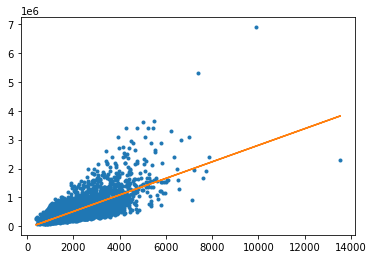

In [14]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

### Now, let's expand the model to include other features

In [15]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

We create the model with these advanced features

In [17]:
my_advance_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 14464

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.068454     | 4242645.765320     | 1076198.411230       | 164033.431379                   | 142583.398974                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

### Evaluating the model~

In [18]:
my_advance_features_model.evaluate(test_set)

{'max_error': 3105556.2734449655, 'rmse': 156748.4788721326}

## We can check how this two models predict house prices

We select one house

In [19]:
house1 = sales[sales['id']=='5309101200']
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

This house has a selling price of 620000.0, let's see what is the price predicted by our models

In [20]:
sqft_model.predict(house1)

dtype: float
Rows: 1
[632055.4188046278]

In [23]:
my_advance_features_model.predict(house1)

dtype: float
Rows: 1
[661237.494242724]

### Our first model with one feature predicts a price of 632055.41. In contrast, our model with more features predicts a price of 661237.49. 

### Now, let's do a second prediction with another house

In [25]:
house2 = sales[sales['id']=='1925069082']
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

This house has a higher price of 2200000.0.

In [26]:
sqft_model.predict(house2)

dtype: float
Rows: 1
[1272559.1048713562]

In [27]:
my_advance_features_model.predict(house2)

dtype: float
Rows: 1
[1938853.6274572378]

### In this case, the second model with more features provides a better prediction of the original price